<a href="https://colab.research.google.com/github/riskakurniaa/Machine-Learning/blob/Jobsheet4/Tugas1_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : **Riska Kurnia Triwulandari**  
Kelas : **3A**  
NIM   : **2241720039**

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
- Menggunakan data spam.csv
- Fitur CountVectorizer dengan mengaktifkan stop_words
- Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
- Menggunakan data spam.csv
- Fitur TF-IDF dengan mengaktifkan stop_words
- Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
- Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

###**Jawab**

##**1. Klasifikasi Data Suara dengan SVM**

Import Library dan Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("voice.csv")
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Kode tersebut merupakan bagian dari persiapan untuk melakukan klasifikasi pada dataset.

###**Analisisi Bentuk Data**

Memberikan ringkasan informasi tentang DataFrame data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

Memeriksa jumlah nilai yang hilang (null) dalam setiap kolom di DataFrame data:

In [4]:
data.isnull().sum()

,0
meanfreq,0
sd,0
median,0
Q25,0
Q75,0
IQR,0
skew,0
kurt,0
sp.ent,0
sfm,0


Menampilkan ringkasan statistik dari DataFrame data. Perintah tersebut memberikan gambaran umum tentang distribusi data numerik dalam setiap kolom.

In [5]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


###**Encode Label**

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


- Kode tersebut mengimport LabelEncode untuk mengubah label kategori menjadi format numerik dan StandartScaler yang digunakan untuk menstandarisasikan fitur.
- le pada kode program tersebut merupakan objek melakukan encoding label.
- Hasil encoding yang dilakukan lalu disimpan dalam kolom label pada DataFrame.
- Lalu menampilkan 5 baris pertama dari DataFrame setelah proses encoding untuk melihat perubahan yang terjadi.


###**Visualisasi Distribusi Fitur-Fitur Suara**

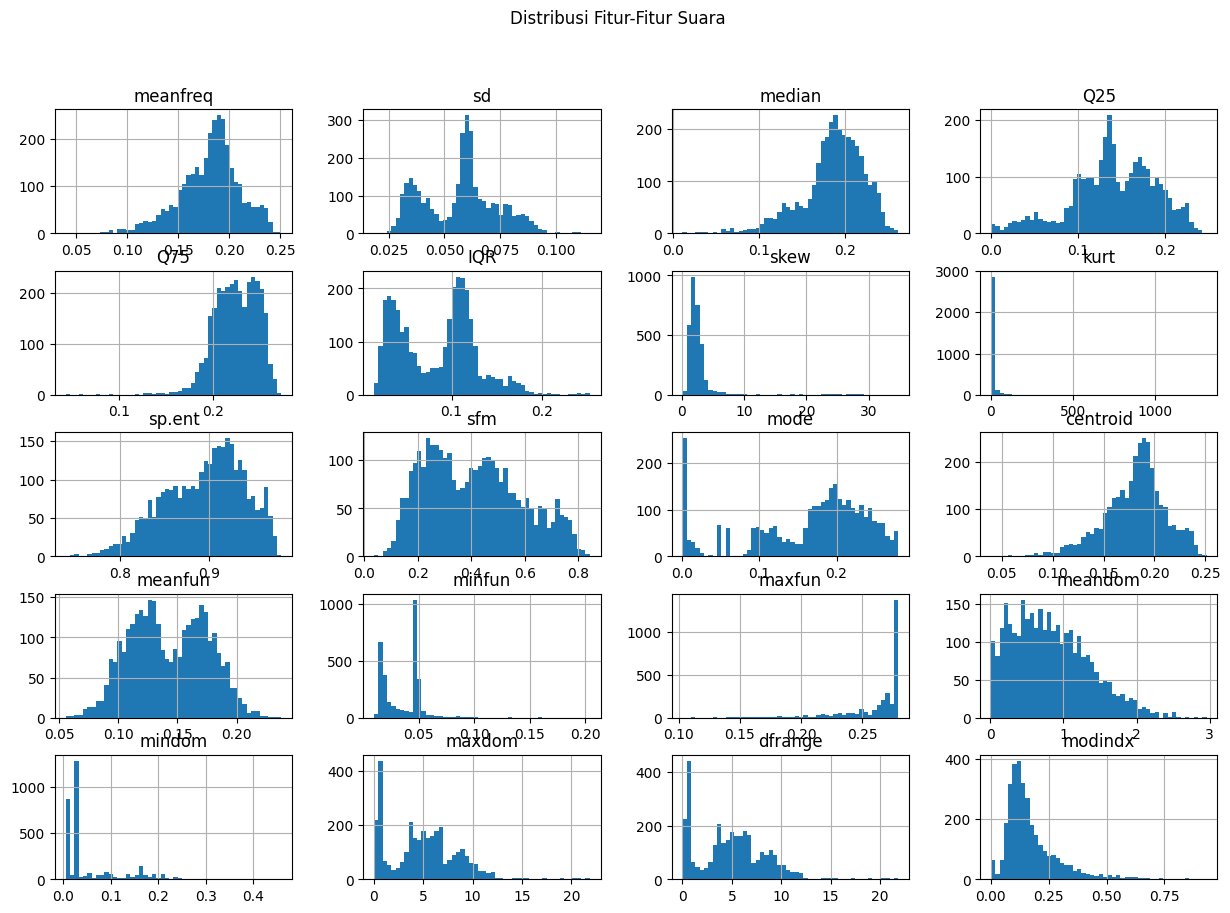

In [7]:
data['label'].value_counts()
data.drop('label', axis=1).hist(bins=50, figsize=(15, 10))
plt.suptitle('Distribusi Fitur-Fitur Suara')
plt.show()

Metode value_counts() digunakan untuk menghitung berapa kali setiap kategori dalam kolom label muncul. Selain untuk menghitung jumlah kemuncukan label, kode program diatas juga bertujuan untuk membuat histogram untuk fitur fitur suara dalam dataset.

In [8]:
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])
data['label'].head()

,label
0,1
1,1
2,1
3,1
4,1


Heatmap Korelasi untuk membantu melihat ketergantungan setiap variabel.

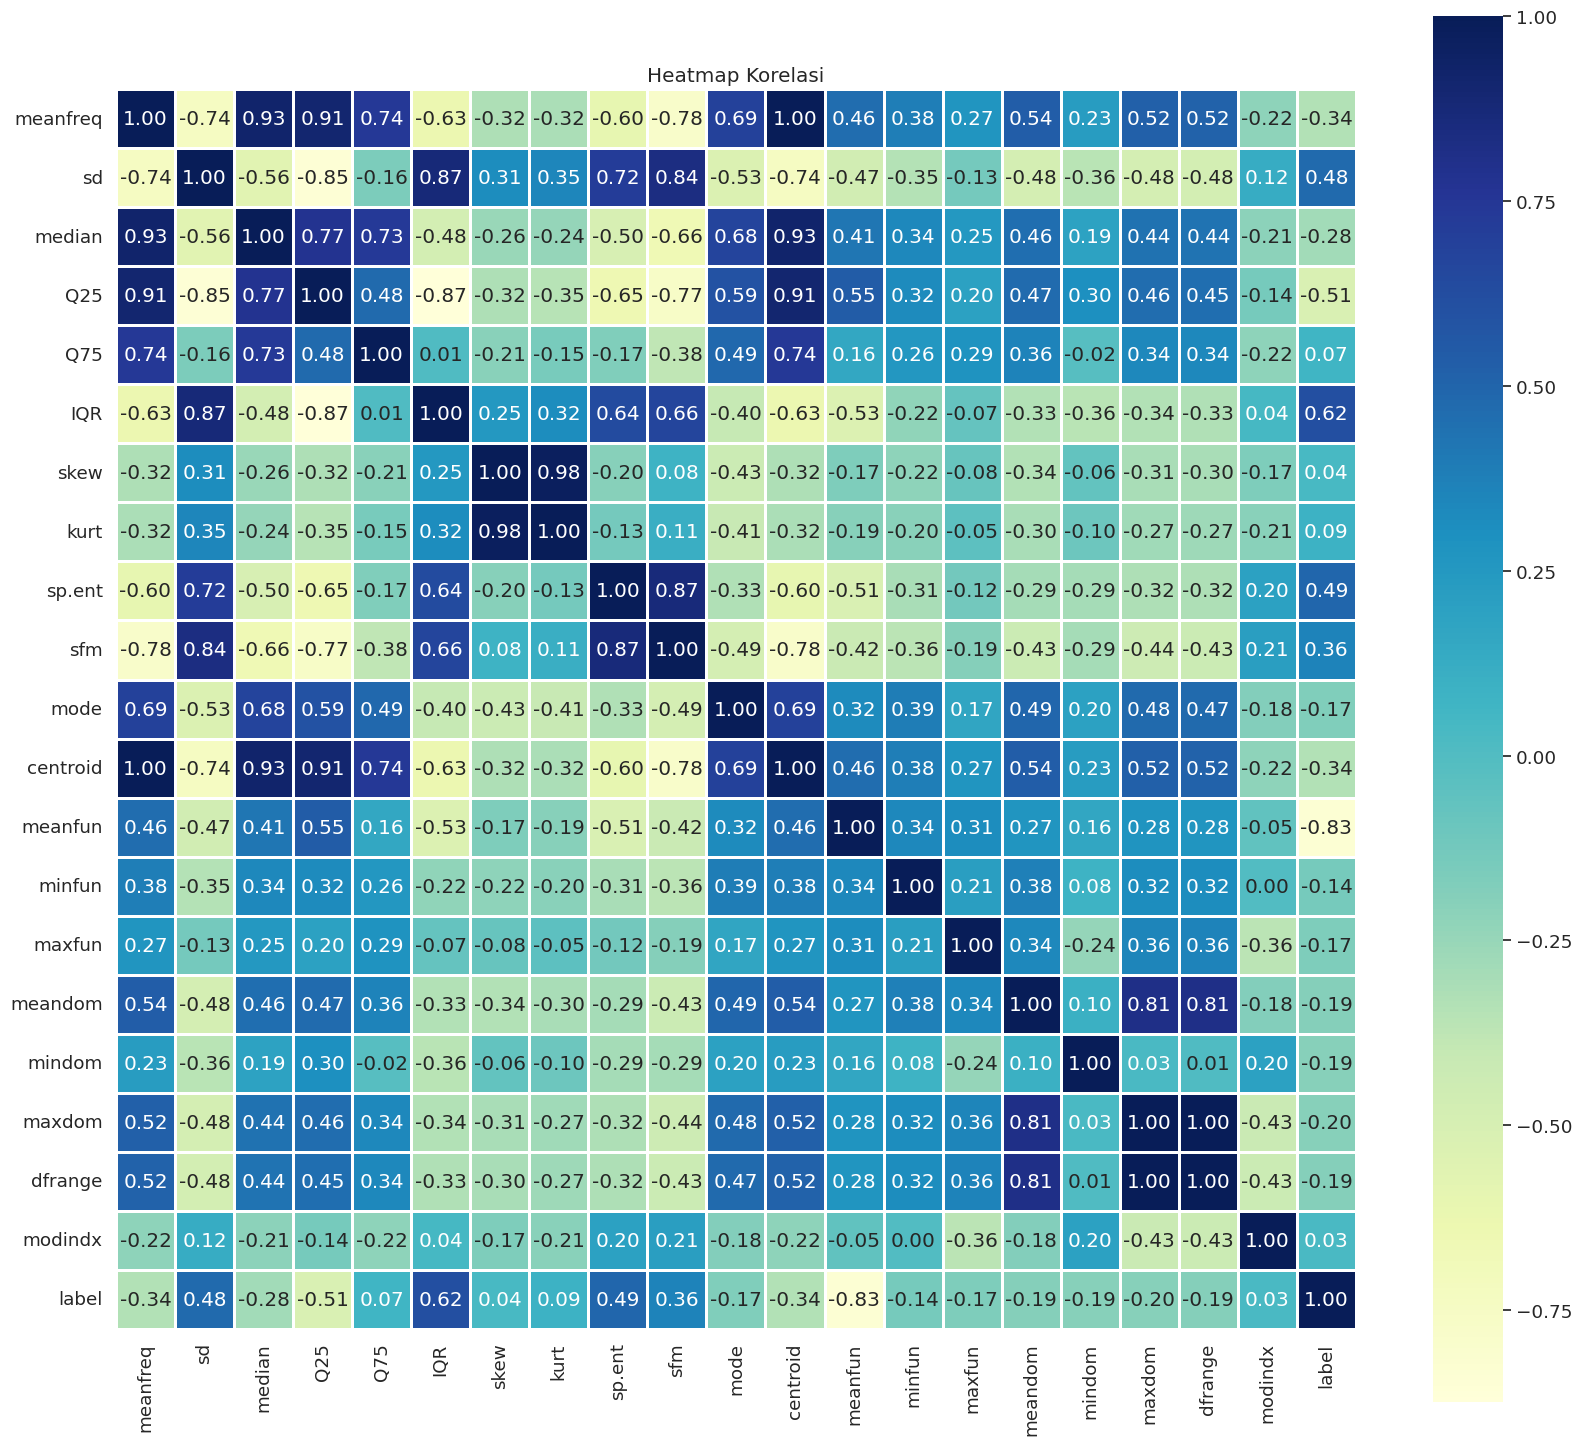

In [9]:
plt.figure(figsize=(20, 18))
corr_matrix = data.corr()
sns.set(font_scale=1.2)
sns.heatmap(corr_matrix, cmap='YlGnBu', linewidths=1, fmt=".2f", annot=True, cbar=True, square=True)
plt.title('Heatmap Korelasi')
plt.show()

Jadi dapat kita lihat bahwa meanfreg dan centroid nilai yang sama menunjukkan adanya multicollinearity.

###**Pemisahan Fitur dan Label**

In [10]:
X = data.drop('label', axis=1)
y = data['label']

memisahkan data training dan data test

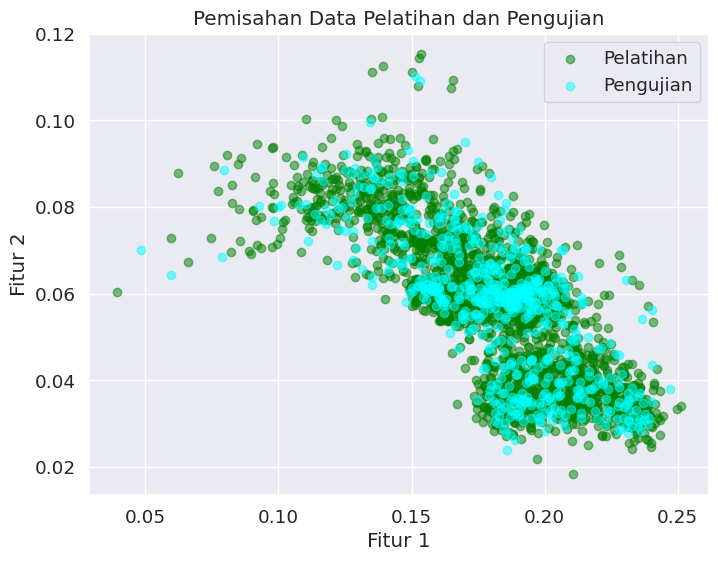

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='green', label='Pelatihan', alpha=0.5)
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c='cyan', label='Pengujian', alpha=0.5)
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(loc='best')
plt.title('Pemisahan Data Pelatihan dan Pengujian')
plt.show()

###**Training dan Evaluasi Model SVM**

In [12]:
from sklearn.svm import SVC
from sklearn import metrics
svc = SVC()
svm_classifier = SVC(kernel='linear')

Menstandarisasi fitur-fitur dalam dataset menggunakan StamdardScaler dari scikit-learn

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['label'], axis=1))
scaled_features

array([[-4.04924806,  0.4273553 , -4.22490077, ..., -1.43142165,
        -1.41913712, -1.45477229],
       [-3.84105325,  0.6116695 , -3.99929342, ..., -1.41810716,
        -1.4058184 , -1.01410294],
       [-3.46306647,  1.60384791, -4.09585052, ..., -1.42920257,
        -1.41691733, -1.06534356],
       ...,
       [-1.29877326,  2.32272355, -0.05197279, ..., -0.5992661 ,
        -0.58671739,  0.17588664],
       [-1.2452018 ,  2.012196  , -0.01772849, ..., -0.41286326,
        -0.40025537,  1.14916112],
       [-0.51474626,  2.14765111, -0.07087873, ..., -1.27608595,
        -1.2637521 ,  1.47567886]])

Melakukan split data menjadi data training dan data testing dengan perbandingan 80:20

In [14]:
from sklearn.model_selection import train_test_split

X = scaled_features
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1000)

In [15]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

Melakukan proses pelatihan dan prediksi memungkinkan evaluasi kinerja model. Serta mengevaluasi terhadap akurasi dan laporan klasifikasi membantu memahami seberapa baik model dalam mengklasifikasikan data.

In [16]:
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Definisikan model SVM
svm_model = SVC(kernel='linear', C=5)

# Lakukan training pada data
svm_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = svm_model.predict(X_test)

# Hitung accuracy
acc = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {int(acc * 100)}%')

# Cetak classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy Score: 97%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       299
           1       0.97      0.99      0.98       335

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



##**2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,**
- Menggunakan data spam.csv
- Fitur CountVectorizer dengan mengaktifkan stop_words
- Evaluasi hasilnya

###**Import Library dan Load Data**

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data_spam = pd.read_csv("spam.csv", encoding="latin-1")
data_spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


###**Analisis Bentuk Data**

In [18]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


###**Ringkasan Statistik dari data_spam**

In [19]:
data_spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


###**Memeriksa jumlah nilai null pada data_spam**

In [20]:
data_spam.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


Hapus data yang tidak diperlukan karena terdapat data yang bernilai, maka diperlukan penghapusan data tersebut.

In [21]:
data_spam.drop(data_spam.iloc[:, 2:], axis=1, inplace=True)
data_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###**Ubah nama Kolom V1 dan V2**

In [22]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

data_spam = data_spam.rename(columns=new_cols)

data_spam.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###**Inspeksi Data**

In [23]:
print(data_spam['Labels'].value_counts())
print('\n')

print(data_spam.info())
print('\n')

print(data_spam.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


###**Encode Label**

In [24]:
new_labels = {
    'spam': 1,
    'ham': 0
}

data_spam['Labels'] = data_spam['Labels'].map(new_labels)
data_spam.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


###**Memisahkan Fitur dengan Label**

In [25]:
X = data_spam['SMS'].values
y = data_spam['Labels'].values

###**Pemisahan Data Train dan Data Test**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

###**Ekstraksi Fitur dengan CountVectorizer**

In [27]:
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(len(vectorizer.get_feature_names_out()))
print(f'Data Dimension: {X_train.shape}')

7466
Data Dimension: (4457, 7466)


###**Training Model Multinomial Naive Bayes**

In [28]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

###**Prediksi Model**

In [29]:
y_pred_train = nb_model.predict(X_train)
acc_train = accuracy_score(y_train, y_pred_train)
y_pred_test = nb_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy Data Train: {acc_train}')
print(f'Accuracy Data Test: {acc_test}')

accuracyCount = metrics.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {int(acc * 100)}%')

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Accuracy Data Train: 0.9946152120260264
Accuracy Data Test: 0.9829596412556054
Accuracy Score: 97%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.98      0.90      0.94       161

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



##**3. Klasfikasi Multinomial Naive Bayes dengan Fitur TF-IDF**


###**Import Data, Load Data, dan Drop Kolom**

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Baca data dari file CSV
data_spam = pd.read_csv("spam.csv", encoding="latin-1")
data_spam = data_spam.drop(data_spam.iloc[:, 2:], axis=1)
data_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###**Ubah Nama Kolom V1 dan V2**

In [31]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

data_spam = data_spam.rename(columns=new_cols)
data_spam.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###**Inspeksi Data**

In [32]:
print(data_spam['Labels'].value_counts())
print('\n')
print(data_spam.info())
print('\n')
print(data_spam.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Kode tersebut digunakan untuk melakukan penghitungan jumlah kemunculan setiap label, menampilkan informasi DataFrame, dan menampilkan ringkasan statistik.

Mengubah label menjadi angka 1 atau 0

In [33]:
new_labels = {
    'spam': 1,
    'ham': 0
}

data_spam['Labels'] = data_spam['Labels'].map(new_labels)
data_spam.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


###**Memisahkan Fitur dengan Label**

In [34]:
X = data_spam['SMS'].values
y = data_spam['Labels'].values

###**Pemisahan data Train dan Data Test**

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

###**Ekstraksi Fitur dengan TF-IDF**

In [36]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

###**Mengubah data teks menjadi representasi numerik.**

In [37]:
print(len(tfidf_vectorizer.get_feature_names_out()))
print(f'Data Dimension: {X_train_tfidf.shape}')

7466
Data Dimension: (4457, 7466)


###**Training Model Multinomial Naive Bayes dengan TF-IDF**

In [38]:
nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

###**Evaluasi Model dengan TF-IDF**

In [39]:
y_pred_train_tfidf = nb_model.predict(X_train_tfidf)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = nb_model.predict(X_test_tfidf)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Accuracy Data Train: {acc_train}')
print(f'Accuracy Data Test: {acc_test}')

accuracyTF = metrics.accuracy_score(y_test, y_pred_test)
print(f'Accuracy Score: {int(acc * 100)}%')

report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", report)

Accuracy Data Train: 0.9946152120260264
Accuracy Data Test: 0.9757847533632287
Accuracy Score: 97%
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



##**Kesimpulan**

Jadi, Akurasi yang didapatkan dari penggunaan CountVectorizer dan TF-IDF Vectorizer:

*   CountVectorizer : 0.9829596412556054
*   TF-IDF Vectorizer : 0.9757847533632287


Dapat dilihat, akurasi dari penggunaan CoutVectorizer dan TF-IDF Vectorizer relatif sama meskipun akurasi pada CountVectorizer lebih tinggi sedikit.

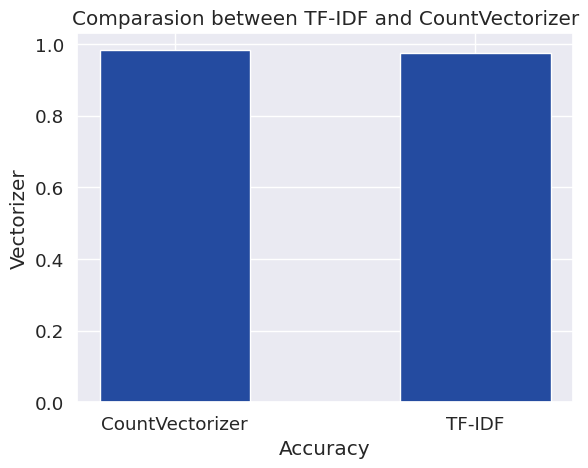

In [40]:
plt.bar(['CountVectorizer', 'TF-IDF'], [accuracyCount, accuracyTF], color='#244ba0', width=0.5)
plt.title('Comparasion between TF-IDF and CountVectorizer')
plt.xlabel('Accuracy')
plt.ylabel('Vectorizer')
plt.show()